# Seaborn 
### (Statistical Data Visualization: 통계기반 시각화)
*다양한 그래프 그리기를 갖춘 라이브러리

### PDF (Probability Density Function: 확률 밀도 함수)
* 데이터셋의 분포를 나타냄
* 히스토그램의 막대수를 무한으로 늘린것 (적분 개념), 
* 특정 구간의 확률 = 특정구간의 넓이
* 모든 구간의 넓이 = 1

![PDF](data/lec9_Seaborn/PDF.png)
   
주사위 숫자, 동전 면 개수등 불연속적인 값은 확률을 계산하는게 직관적이지만, 
  
키, 몸무게, 속도처럼 연속적인 값은 특정한 값을 계산하는게 불가능하다 (ex. 키가 정확히 168.1인 사람은 존재하기 어렵다.)  
따라서 연속적인 값들은 특정 범위로 그 확률을 추론한다

 ---
 ### KED plot
 #### (Kernel Density Estimation) : 연속적인 값들을 PDF그래프로 만들어 준다.
 
 실제 데이터를 그리면 경우 연속된 값들이라 해도 실제 데이터들은 굴곡이 많을 수 밖에 없다
 이를 깔끔한 그래프로 그려주는게 KED

In [ ]:
!pip install Seaborn

In [5]:
import pandas as pd
import seaborn as sns

# body_df = pd.read_csv('data/lec9_Seaborn/body.csv', index_col= 0)
body_df.head()

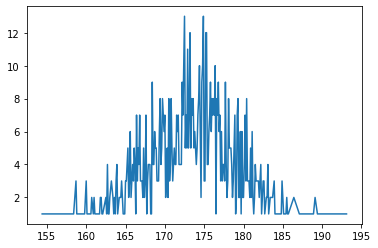

In [12]:
body_df['Height'].value_counts().sort_index().plot() # sort_index -> 인덱스 순으로 정렬

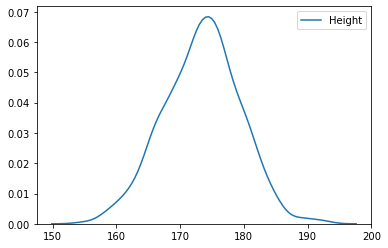

In [15]:
sns.kdeplot(body_df['Height']) # 확률 밀도 함수
# 이는 실제 데이터와 다르다.. 가진 값들을 통해 KED가 추측을 해서 그린다.

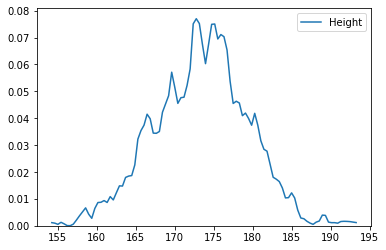

In [25]:
# 추측값을 조정해줄 수 있다 (bw)
sns.kdeplot(body_df['Height'], bw=0.05)

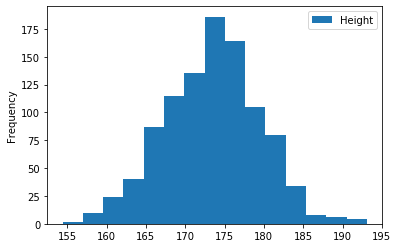

In [27]:
body_df.plot(kind='hist', y='Height', bins=15)

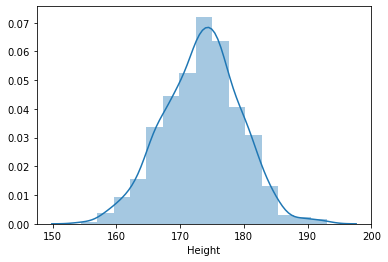

In [29]:
sns.distplot(body_df['Height'], bins=15)

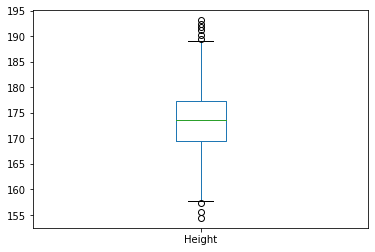

In [31]:
body_df.plot(kind='box', y='Height')

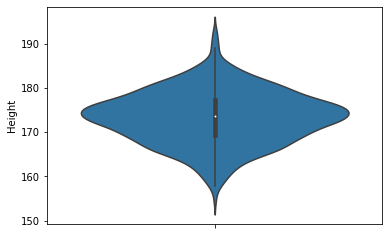

In [37]:
sns.violinplot(y=body_df['Height']) # KDE 그래프의 2개를 양쪽에 붙인느낌

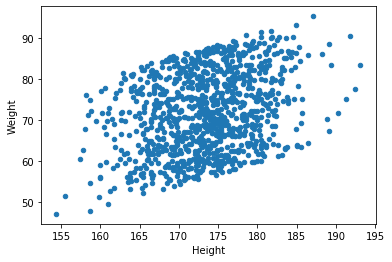

In [35]:
body_df.plot(kind='scatter', x='Height', y='Weight')

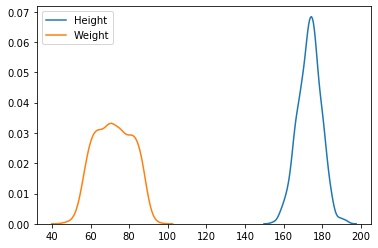

In [42]:
sns.kdeplot(body_df['Height'])
sns.kdeplot(body_df['Weight'])

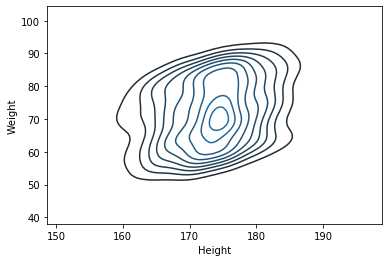

In [45]:
sns.kdeplot(body_df['Height'], body_df['Weight']) # x축은 키에대한 kde, y축에는 몸무게에 대한 kde를 그려 위에서 그림

## LM plot 
* 값을 유추하는 seaborn Library

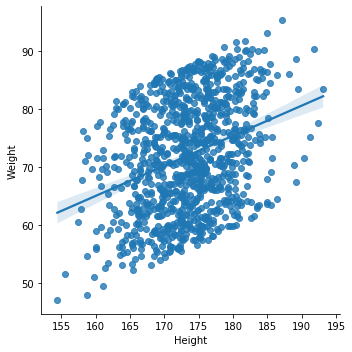

In [46]:
sns.lmplot(data=body_df, x='Height', y='Weight')

#### 산점도가 그려지고 Ligression Line을 그려준다

---
## 카테고리별 시각화

In [47]:
import pandas as pd
import seaborn as sns

In [49]:
laptops_df = pd.read_csv('data/lec9_Seaborn/laptops.csv')
laptops_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [51]:
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

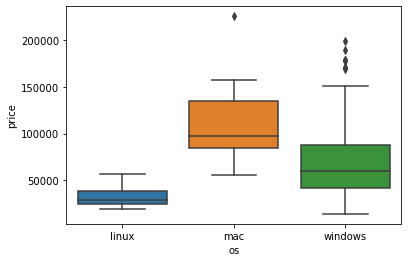

In [103]:
sns.boxplot(y=(laptops_df['price']), x=(laptops_df['os']))

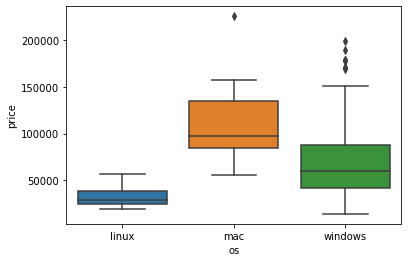

In [106]:
sns.boxplot(data=laptops_df, y='price', x='os')

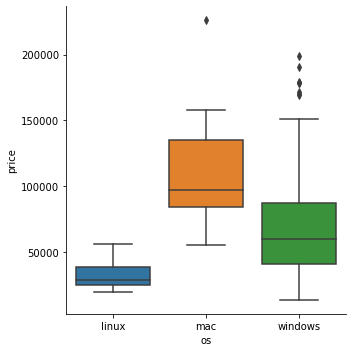

In [107]:
sns.catplot(data=laptops_df, x='os', y='price', kind='box')

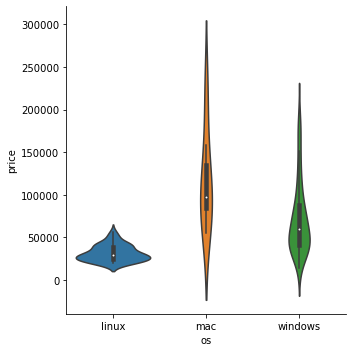

In [109]:
sns.catplot(data=laptops_df, x='os', y='price', kind='violin')

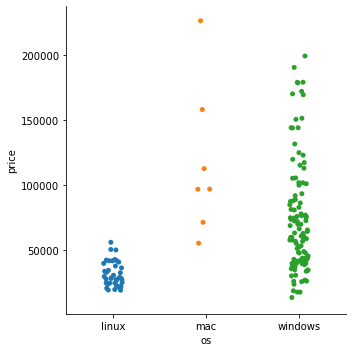

In [111]:
sns.catplot(data=laptops_df, x='os', y='price', kind='strip') # strip = 데이터를 하나하나 보기

In [112]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

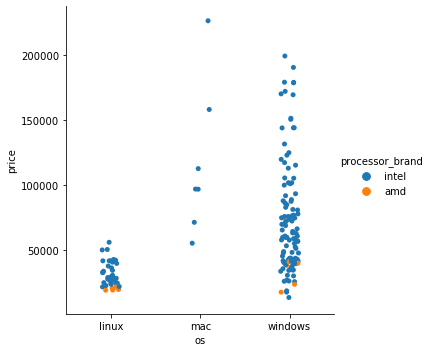

In [113]:
sns.catplot(data=laptops_df, x='os', y='price', kind='strip', hue='processor_brand') # hue 옵션 = 명시마다 색을 다르게 칠하기

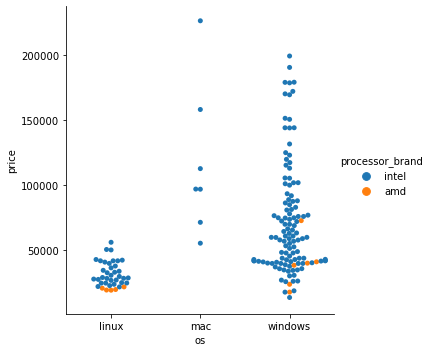

In [117]:
sns.catplot(data=laptops_df, x='os', y='price', kind='swarm', hue='processor_brand') # swarm = strip의 겹쳐진 점들을 펼쳐보이기